In [22]:
function nextGeneration(populationSize, proportion, p0to1 = 0, p1to0 = 0, selectionFactor = 0)
    """
    Returns the new vector of population and its characteristic, 
    using the vector of the old generation and its characteristic.
    p0to1 is the transition probability from state 0 to state 1 in the mutation case
    p1to0 is the transition probability from state 1 to state 0 in the mutation case
    selectionFactor is the factor of selection for state 1 in the selection case
    """
    
    # Number of 1 in the old generation
    newProportion0 = floor(proportion*populationSize)
    
    # Mutations
    if(p0to1 > 0)
        for j in 1:floor(populationSize*(1-proportion))
        # rand() gives a number in (0,1). Simulation of a random variable following a Bernoulli distribution
            if rand() <= p0to1
                newProportion0 += 1
            end
        end    
    end

    if (p1to0 > 0)
        for j in 1:floor(populationSize*(proportion))
            if rand() <= p1to0
                newProportion0 -= 1
            end
        end
    end
        
    newProportion = 0
    
    # Next Generation
    if (selectionFactor == 0)
        for i in 1:populationSize
            if rand() < (newProportion0/populationSize)
                newProportion += 1
            end
        end
    else
        for i in 1:populationSize
            if rand() < (newProportion0*(1+selectionFactor)/(newProportion0*(1+selectionFactor)+populationSize-newProportion0))
                newProportion += 1
            end
        end  
    end
    return (newProportion/populationSize)
end

nextGeneration (generic function with 4 methods)

In [23]:
function trajectory(populationSize, initialProportion, finalTime, p0to1 = 0, p1to0 = 0, selectionFactor = 0)
    """
    Run the Wright-Fisher model algorithm.
    Returns the whole trajectory of proportions and the time of absorption (0 if no absorption)
    finalTime is how many generations you produce
    p0to1 and p1to0 are transition probabilities for the mutations case
    selectionFactor is the factor of selection for state 1 in the selection case
    """
    
    listOfProportions = zeros(Float64, finalTime)
    infTimeAbsorption = 0
    
    # Initializing the population
    currentProportion = initialProportion
    
    # First proportion added to the trajectory
    listOfProportions[1] = currentProportion

    for time in 2:finalTime
        
        currentProportion = nextGeneration(populationSize, currentProportion, p0to1, p1to0, selectionFactor)
        
        if (infTimeAbsorption == 0 && (currentProportion == 0 || currentProportion == 1))
            infTimeAbsorption = time
        end
        
        # Adding the proportion to the trajectory
        listOfProportions[time] = currentProportion
    end
    
    # Returns the whole trajectory
    return infTimeAbsorption, listOfProportions
end  

trajectory (generic function with 4 methods)

In [24]:
function plotTrajectory(populationSize, initialProportion, finalTime, p0to1 = 0, p1to0 = 0, selectionFactor = 0)
    """
    Plot a trajectory
    """
    
    ioff()
    
    time, traj = trajectory(populationSize, initialProportion, finalTime, p0to1, p1to0, selectionFactor)
    listOfTimes = collect(1:length(traj))
    title("Proportion over time")
    xlabel("Time")
    ylabel("Proportion")
    ylim(0,1)
    grid(true)

    plot(listOfTimes, traj, color="red")
    show()
end

plotTrajectory (generic function with 4 methods)

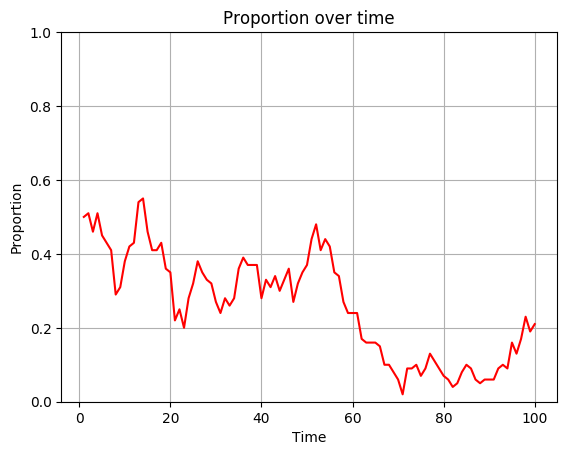

In [25]:
### Example of a trajectory ###

using PyPlot

populationSize = 100
initialProportion = 0.5
finalTime = 100
p0to1 = 0.002
p1to0 = 0.003
selectionFactor = 0.001
plotTrajectory(populationSize, initialProportion, finalTime, p0to1, p1to0, selectionFactor)

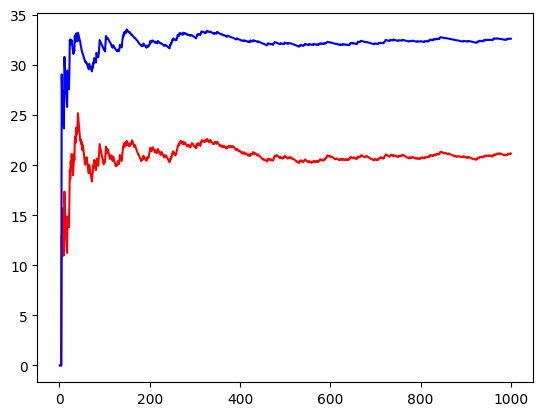

In [5]:
using Statistics

numberOfIterations = 1000
collectionOfTimeAbsorption = zeros(Float64, numberOfIterations)
meanTimeAbsorption = zeros(Float64, numberOfIterations)
standardDeviationTimeAbsorption = zeros(Float64, numberOfIterations)

res, vector = trajectory(populationSize, initialProportion, finalTime, p0to1, p1to0, selectionFactor)
collectionOfTimeAbsorption[1] = res
meanTimeAbsorption[1] = res
standardDeviationTimeAbsorption[1] = 0

for i in 2:numberOfIterations
    res, vector = trajectory(populationSize, initialProportion, finalTime, p0to1, p1to0, selectionFactor)
    collectionOfTimeAbsorption[i] = res
    meanTimeAbsorption[i] = mean(collectionOfTimeAbsorption[1:i])
    standardDeviationTimeAbsorption[i] = std(collectionOfTimeAbsorption[1:i])
end


plot(1:numberOfIterations, meanTimeAbsorption, color="red")
plot(1:numberOfIterations, standardDeviationTimeAbsorption, color="blue")
show()


In [26]:
using Statistics

function estimation_of_pN(Number_of_it, populationSize, initialProportion, finalTime, p0to1 = 0, p1to0 = 0, selectionFactor = 0)
    collection_of_final_proportion = zeros(Float64, Number_of_it)
    for i in 1:Number_of_it
        res, traj = trajectory(populationSize, initialProportion, finalTime, p0to1, p1to0, selectionFactor)
        if(res!=0)
            collection_of_final_proportion[i] = traj[res]
        else
            return "error, finalTime too small"
        end
    end
    return mean(collection_of_final_proportion), std(collection_of_final_proportion)
end    

estimation_of_pN (generic function with 4 methods)

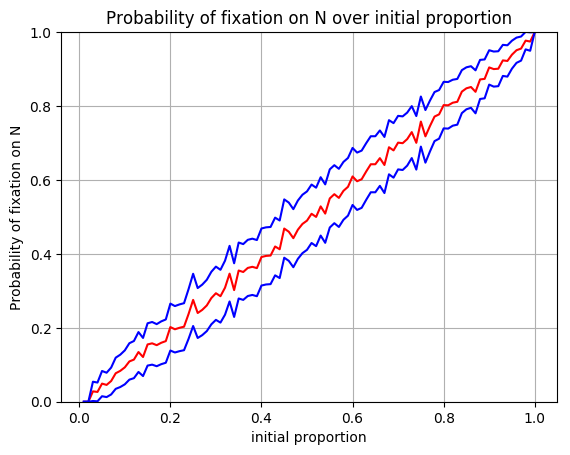

In [27]:
Nb_it = 2000
Nb_initial_propo = 100
populationSize = 40
finalTime = 3000
collection_of_initialProportions =  [i/Nb_initial_propo for i=1:Nb_initial_propo]
collection_of_estimated_pN = zeros(Float64, Nb_initial_propo)
collection_of_deviation = zeros(Float64, Nb_initial_propo)
for i in 1:Nb_initial_propo
    estimated_pN, deviation = estimation_of_pN(Nb_it, populationSize,collection_of_initialProportions[i],finalTime)
    collection_of_estimated_pN[i] = estimated_pN
    collection_of_deviation[i] = deviation
end

"""
Plot Px(XT = N) depending on the initial proportion x
"""
    
ioff()

title("Probability of fixation on N over initial proportion")
xlabel("initial proportion")
ylabel("Probability of fixation on N")
ylim(0,1)
grid(true)

plot(collection_of_initialProportions, collection_of_estimated_pN , color="red")
plot(collection_of_initialProportions, collection_of_estimated_pN+collection_of_deviation/sqrt(populationSize) , color="blue")
plot(collection_of_initialProportions, collection_of_estimated_pN-collection_of_deviation/sqrt(populationSize), color="blue")
show()



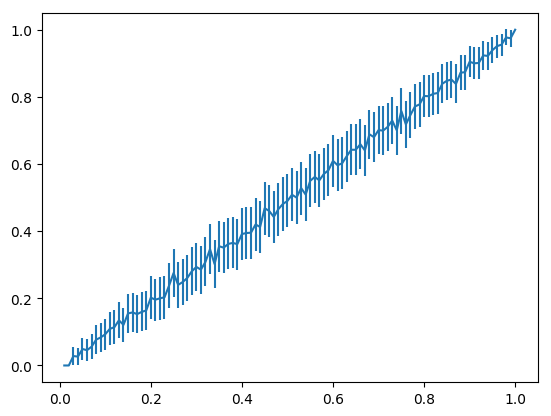

(PyObject <matplotlib.lines.Line2D object at 0x7f4bc4f24320>, (), (PyObject <matplotlib.collections.LineCollection object at 0x7f4bc4f24668>,))

In [28]:
errorbar(collection_of_initialProportions, collection_of_estimated_pN, yerr = collection_of_deviation/sqrt(populationSize))

In [29]:
display("text/latex", """
Processus Diffusif
""")

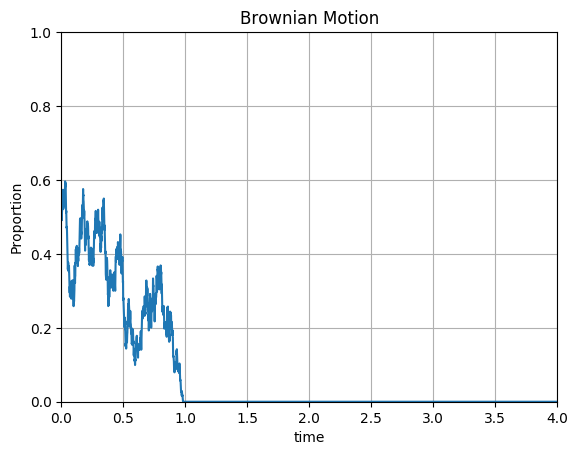

PyObject Text(24.000000000000007, 0.5, 'Proportion')

In [30]:
using PyPlot

N = 4000
collectionOfTimes = [i/1000 for i=1:4000]
initialProportion = 0.5
finalTime = 4*(N+1)
res, vector = trajectory(N, initialProportion, finalTime)
collectionOfProportions = zeros(Float64, length(collectionOfTimes))
for i in 1:length(collectionOfTimes)
    collectionOfProportions[i] = vector[floor(Int, collectionOfTimes[i]*N)+1]
end

plot(collectionOfTimes, collectionOfProportions)
title("Brownian Motion")
grid("true")
axis([0,4,0,1])
xlabel("time")
ylabel("Proportion")

In [31]:
display("text/latex", """
Exemple 27.13, espérance du temps de fixation sans sélection ni mutation
""")

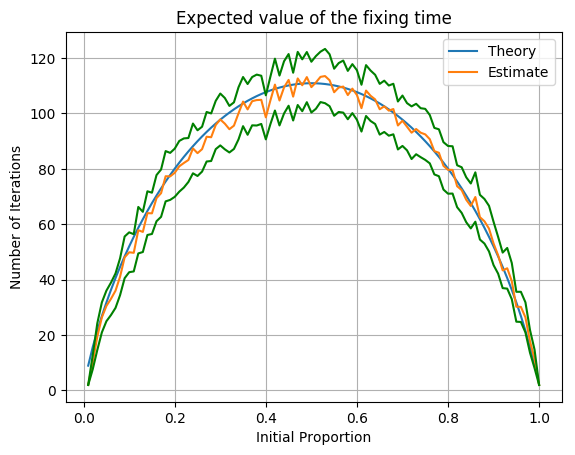

PyObject <matplotlib.legend.Legend object at 0x7f4bc4d29160>

In [32]:
using PyPlot

N = 80
Nb_Initial_Proportions = 100
finalTime = 2000
X = [i/Nb_Initial_Proportions for i=1:Nb_Initial_Proportions]

Nb_Iterations = 1000
Collection_Time_Absorption = zeros(Int64, Nb_Initial_Proportions, Nb_Iterations)
Y = zeros(Nb_Initial_Proportions)
Y_std = zeros(Nb_Initial_Proportions)

for prop in 1:Nb_Initial_Proportions
    for iter in 1:Nb_Iterations
        res, vector = trajectory(N, X[prop], finalTime)
        Collection_Time_Absorption[prop, iter] = res
    end
    Y[prop] = sum([Collection_Time_Absorption[prop,i] for i=1:Nb_Iterations])/Nb_Iterations
    Y_std[prop] = sqrt(sum([(Collection_Time_Absorption[prop,i] - Y[prop])^2 for i=1:Nb_Iterations]) / (Nb_Iterations - 1))
end

function theory(x)
    return -2*(x*log(x)+(1-x)*log(1-x))
end

Y_theory = [N*theory(X[i]) for i in 1:Nb_Initial_Proportions]
plot(X, Y_theory)

plot(X,Y)
plot(X, Y + Y_std/sqrt(N), color="green")
plot(X, Y - Y_std/sqrt(N), color="green")
grid("true")



title("Expected value of the fixing time")
xlabel("Initial Proportion")
ylabel("Number of Iterations")
legend(["Theory", "Estimate"])

In [33]:
display("text/latex", """
Exemple 27.14, Probabilité de fixation de l'allèle A avec sélection
""")

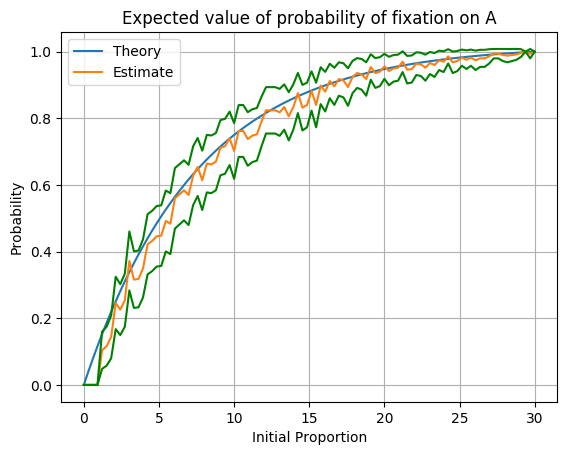

PyObject <matplotlib.legend.Legend object at 0x7f4bc4c85320>

In [34]:
using PyPlot
N = 30
alpha = 2
s = alpha/N
#s = 0.01
#alpha = N*s
Nb_Initial_Proportions = 100
finalTime = 300
X = [(i-1)/(Nb_Initial_Proportions-1) for i=1:Nb_Initial_Proportions]
Nb_Iterations = 500

##we first estimate the probability Px(ZT0,1 = 1) :

Y = zeros(Float64, Nb_Initial_Proportions)
Y_std= zeros(Float64, Nb_Initial_Proportions)
for i in 1:Nb_Initial_Proportions
    estimated_pN, deviation = estimation_of_pN(Nb_Iterations, N,X[i],finalTime,0,0,s)
    Y[i] = estimated_pN
    Y_std[i] = deviation
end

##we compute the exact law 

function Ptheory(x)
    return (1-exp(-2*alpha*x))/(1-exp(-2*alpha))
end

Y_theory = [Ptheory(X[i]) for i in 1:Nb_Initial_Proportions]

##we create the plot

plot(X*N, Y_theory)
plot(X*N,Y)
plot(X*N, Y + Y_std/sqrt(N), color="green")
plot(X*N, Y - Y_std/sqrt(N), color="green")
grid("true")
    
title("Expected value of probability of fixation on A")
xlabel("Initial Proportion")
ylabel("Probability")
legend(["Theory", "Estimate"])

In [37]:
import Pkg;
Pkg.add("DifferentialEquations")
Pkg.add("OrdinaryDiffEq")
Pkg.add("BoundaryValueDiffEq")

 Resolving package versions...
 Installed SteadyStateDiffEq ─────────── v1.4.0
 Installed IteratorInterfaceExtensions ─ v0.1.1
 Installed LearnBase ─────────────────── v0.2.2
 Installed DimensionalPlotRecipes ────── v0.2.0
 Installed StochasticDiffEq ──────────── v5.10.4
 Installed ReverseDiff ───────────────── v0.3.1
 Installed DifferentialEquations ─────── v5.3.1
 Installed ChunkedArrays ─────────────── v0.1.1
 Installed PositiveFactorizations ────── v0.2.1
 Installed OrdinaryDiffEq ────────────── v4.18.3
 Installed SimpleTraits ──────────────── v0.8.0
 Installed Distances ─────────────────── v0.7.4
 Installed GenericSVD ────────────────── v0.2.1
 Installed DiffEqSensitivity ─────────── v2.4.0
 Installed Optim ─────────────────────── v0.17.2
 Installed NLSolversBase ─────────────── v7.1.2
 Installed RecursiveArrayTools ───────── v0.18.5
 Installed NLsolve ───────────────────── v3.0.1
 Installed DiffEqFinancial ───────────── v2.1.0
 Installed BlackBoxOptim ─────────────── v0.4.0
 Inst

  Building SymEngine ────→ `~/.julia/packages/SymEngine/6KyFJ/deps/build.log`
  Building DiffEqBase ───→ `~/.julia/packages/DiffEqBase/8usQ9/deps/build.log`
  Building Sundials ─────→ `~/.julia/packages/Sundials/AL2Km/deps/build.log`
  Building RandomNumbers → `~/.julia/packages/RandomNumbers/cr9ta/deps/build.log`
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
  [1dea7af3] + OrdinaryDiffEq v4.18.3
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
  [764a87c0] + BoundaryValueDiffEq v2.2.1
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


In [43]:
using DifferentialEquations
using OrdinaryDiffEq
using BoundaryValueDiffEq

alpha = 2
tspan = (0.01, 0.99)

function F!(dx,x,p,t)
    z = x[1]
    dz = x[2]
    dx[1] = dz
    dx[2] = -1/(t*(1-t)) -2*alpha*dz
end

function bc!(residual,x,p,t)
    residual[1] = x[1][1]
    residual[2] = x[end][1]
end

bvp = TwoPointBVProblem(F!, bc!, [0.01,0.99], tspan)
sol = solve(bvp, MIRK4(),dt=0.05)
plot(sol)

MethodError: MethodError: no method matching strides(::ODESolution{Float64,2,Array{Array{Float64,1},1},Nothing,Nothing,Array{Float64,1},Array{Any,1},BVProblem{Array{Float64,1},Tuple{Float64,Float64},true,Nothing,ODEFunction{true,typeof(F!),LinearAlgebra.UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing},DiffEqBase.TwoPointBVPFunction{typeof(bc!)},DiffEqBase.StandardBVProblem,Nothing},MIRK4,DiffEqBase.LinearInterpolation{Array{Float64,1},Array{Array{Float64,1},1}}})
Closest candidates are:
  strides(!Matched::SubArray) at subarray.jl:264
  strides(!Matched::Base.CodeUnits) at strings/basic.jl:696
  strides(!Matched::PermutedDimsArray{T,N,perm,iperm,AA} where AA<:AbstractArray where iperm) where {T, N, perm} at permuteddimsarray.jl:62
  ...